<a href="https://colab.research.google.com/github/ssmirnov4/binary_classification/blob/main/binary_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание 3

# Бинарная классификация

**Цель работы:** познакомиться с применением модели машинного обучения для решения задачи классификации (метод логистической регрессии)

Набор данных содержит 13 клинико-патологических признаков, направленных на прогнозирование рецидива высокодифференцированного рака щитовидной железы. Набор данных собирался в течение 15 лет, и каждый пациент наблюдался в течение не менее 10 лет. Содержит следующие атрибуты:
* **Age** – Возраст
* **Gender** – Пол
* **Smoking** - Курение
* **Hx Smoking** – Курил ли человек
* **Hx Radiothreapy** – Лучевая терапия
* **Thyroid Function** – Функция щитовидной железы
* **Physical Examination** – Физическое обследование
* **Adenopathy** – Аденопатия
* **Pathology** – Патология
* **Focality** – Фокальность
* **Risk** – Риск
* **T** – Размер первичной опухоли
* **N** – Метастазы в лимфоузлы
* **M** – Отдаленные метастазы
* **Stage** – Этап
* **Response** – Реакция
* **Recurred** – Рецидив (целевая переменная)

### 1. Импортируем необходимые библиотеки и загружаем необходимые данные

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
data = pd.read_csv("Thyroid_Diff.csv")
data.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


#### Выведем целевую переменную, целевые имена и частоту каждого уникального значения:

In [ ]:
(unique, counts) = np.unique(data['Recurred'], return_counts=True)
print('Unique values of the target variable: ', unique)
print('Counts of the target variable: ', counts)

Unique values of the target variable:  ['No' 'Yes']
Counts of the target variable:  [275 108]


#### Преобразуем все количественные признаки и целевую переменную к типу int64

In [ ]:
pd.set_option('future.no_silent_downcasting', True)
data['T'] = data['T'].replace({
    'T1a': 1,
    'T1b': 2,
    'T2': 3,
    'T3a': 4,
    'T3b': 5,
    'T4a': 6,
    'T4b': 7
}).astype(int)

data['N'] = data['N'].replace({
    'N0': 0,
    'N1': 1,
    'N1a': 1,
    'N1b': 2
}).astype(int)

data['Recurred'] = data['Recurred'].replace({
    'No': 0,
    'Yes': 1
}).astype(int)

data['M'] = data['M'].replace({
    'M0': 0,
    'M1': 1
}).astype(int)

data['Stage'] = data['Stage'].replace({
    'I': 1,
    'II': 2,
    'III': 3,
    'IV': 4,
    'IVA': 5,
    'IVB': 6,
    'IVC': 7
}).astype(int)

data['Risk'] = data['Risk'].replace({
    'Low': 1,
    'Intermediate': 2,
    'High': 3
}).astype(int)


#### Построим столбчатую диаграмму, чтобы увидеть целевую переменную:

<Axes: xlabel='Recurred', ylabel='count'>

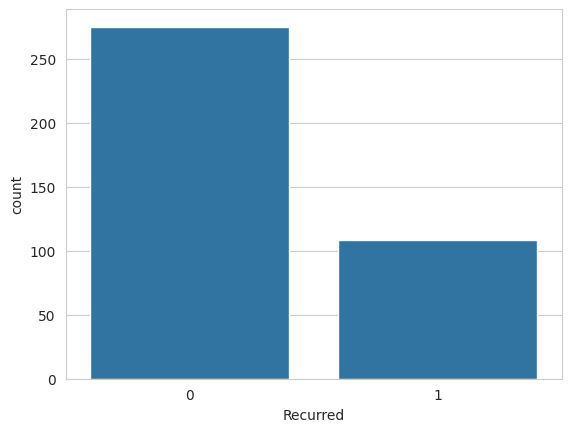

In [ ]:
sns.set_style("whitegrid")
sns.countplot(data, x = 'Recurred')

#### Анализ диаграммы показывает, что набор данных является сбалансированным

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    int64 
 11  T                     383 non-null    int64 
 12  N                     383 non-null    int64 
 13  M                     383 non-null    int64 
 14  Stage                 383 non-null    int64 
 15  Response              383 non-null    ob

#### В этом наборе данных у нас есть два класса: 0 и 1, что делает эту задачу задачей бинарной классификации.

#### Выполним бинарную классификацию с использованием логистической регрессии с помощью sklearn.

### 2. Проверяем наличие пропущенных значений и выбросов

In [ ]:
# проверка на пропущенные значения
print(data.isnull().sum())

Age                     0
Gender                  0
Smoking                 0
Hx Smoking              0
Hx Radiothreapy         0
Thyroid Function        0
Physical Examination    0
Adenopathy              0
Pathology               0
Focality                0
Risk                    0
T                       0
N                       0
M                       0
Stage                   0
Response                0
Recurred                0
dtype: int64


<Axes: xlabel='Age'>

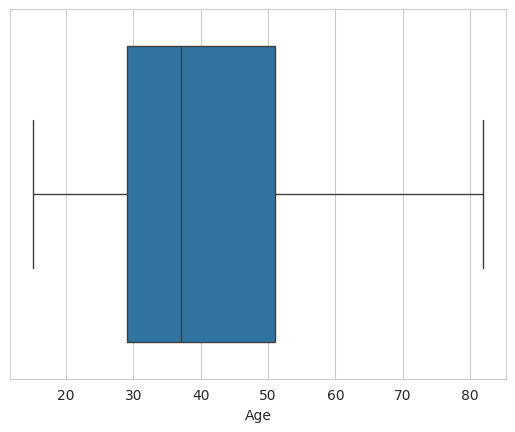

In [ ]:
# проверка на выбросы
sns.boxplot(x=data['Age'])

### 3. Исключаем невлияющие категориальные признаки

In [ ]:
df_copy = data.copy()

cat_feat = ['Gender', 'Hx Smoking']

df_copy.drop(cat_feat, axis=1, inplace=True)

df_copy.head()

,Age,Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,1,1,0,0,1,Indeterminate,0
1,34,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,1,1,0,0,1,Excellent,0
2,30,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,1,1,0,0,1,Excellent,0
3,62,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,1,1,0,0,1,Excellent,0
4,62,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,1,1,0,0,1,Excellent,0


#### Признаки "Hx Radiothreapy", "Adenopath" и "Smoking" имеют по два значения.

Эти признаки, по сути, бинарные и для них можно использовать значения 0 и 1.

In [ ]:
binary_yes_no = {"Yes": 1, "No": 0}
df_copy['Hx Radiothreapy'] = df_copy['Hx Radiothreapy'].map(binary_yes_no)
df_copy['Smoking'] = df_copy['Smoking'].map(binary_yes_no)
df_copy.head()


,Age,Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,0,0,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,1,1,0,0,1,Indeterminate,0
1,34,0,0,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,1,1,0,0,1,Excellent,0
2,30,0,0,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,1,1,0,0,1,Excellent,0
3,62,0,0,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,1,1,0,0,1,Excellent,0
4,62,0,0,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,1,1,0,0,1,Excellent,0


#### Преобразуем все оставшиеся данные к типу int64

In [ ]:
response = {'Excellent': 0, 'Indeterminate': 1, 'Biochemical Incomplete': 2,'Structural Incomplete': 3}
thyroid = {'Euthyroid': 0, 'Clinical Hyperthyroidism': 1, 'Clinical Hypothyroidism': 2, 'Subclinical Hyperthyroidism': 3, 'Subclinical Hypothyroidism': 4}
exam = {'Normal': 0, 'Diffuse goiter': 1, 'Multinodular goiter': 2, 'Single nodular goiter-left': 3, 'Single nodular goiter-right': 4}
adenop = {'No': 0, 'Left': 1, 'Right': 2, 'Bilateral': 3, 'Posterior': 4, 'Extensive': 5}
pathol = {'Papillary': 1, 'Micropapillary': 2, 'Follicular': 3, 'Hurthel cell': 4}
focal = {'Uni-Focal': 0, 'Multi-Focal': 1}
df_copy['Thyroid Function'] = df_copy['Thyroid Function'].map(thyroid)
df_copy['Physical Examination'] = df_copy['Physical Examination'].map(exam)
df_copy['Adenopathy'] = df_copy['Adenopathy'].map(adenop)
df_copy['Pathology'] = df_copy['Pathology'].map(pathol)
df_copy['Focality'] = df_copy['Focality'].map(focal)
df_copy['Response'] = df_copy['Response'].map(response)



### 4. Разделяем данные на признаки и целевую переменную

In [ ]:
y = df_copy['Recurred']
X = df_copy.drop('Recurred', axis=1)

In [ ]:
X

,Age,Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response
0,27,0,0,0,3,0,2,0,1,1,0,0,1,1
1,34,0,0,0,2,0,2,0,1,1,0,0,1,0
2,30,0,0,0,4,0,2,0,1,1,0,0,1,0
3,62,0,0,0,4,0,2,0,1,1,0,0,1,0
4,62,0,0,0,2,0,2,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,72,1,1,0,4,2,1,0,3,7,2,1,6,2
379,81,1,1,0,2,5,1,1,3,7,2,1,6,3
380,72,1,0,0,2,3,1,1,3,7,2,1,6,3
381,61,1,1,1,2,5,4,1,3,7,2,0,5,3


### 5. Применяем операцию нормализации для численной устойчивости

In [ ]:
from sklearn.preprocessing import StandardScaler
standardizer = StandardScaler()
X = standardizer.fit_transform(X)

In [ ]:
X

array([[-9.17439285e-01, -3.83022959e-01, -1.36444206e-01, ...,
        -2.22069963e-01, -2.96032262e-01,  6.28451780e-03],
       [-4.54314690e-01, -3.83022959e-01, -1.36444206e-01, ...,
        -2.22069963e-01, -2.96032262e-01, -7.96038922e-01],
       [-7.18957316e-01, -3.83022959e-01, -1.36444206e-01, ...,
        -2.22069963e-01, -2.96032262e-01, -7.96038922e-01],
       ...,
       [ 2.05979025e+00,  2.61080955e+00, -1.36444206e-01, ...,
         4.50308536e+00,  5.00211523e+00,  1.61093140e+00],
       [ 1.33202303e+00,  2.61080955e+00,  7.32900305e+00, ...,
        -2.22069963e-01,  3.94248573e+00,  1.61093140e+00],
       [ 1.72898697e+00,  2.61080955e+00, -1.36444206e-01, ...,
        -2.22069963e-01,  3.94248573e+00,  1.61093140e+00]])

### 6. Разделяем данные на тренировочный и тестовый наборы

#### 75% данных используется для обучения и 25%- для тестирования.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

### 7. Обучаем модель логистической регрессии

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

### 8. Делаем прогноз на основе данных тестирования

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

accuracy = (TP+TN) /(TP+FP+TN+FN)
print('Accuracy of the binary classification = {:0.3f}'.format(accuracy))

True Positive(TP)  =  26
False Positive(FP) =  3
True Negative(TN)  =  63
False Negative(FN) =  4
Accuracy of the binary classification = 0.927


In [ ]:
# оцениваем точность модели
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9270833333333334


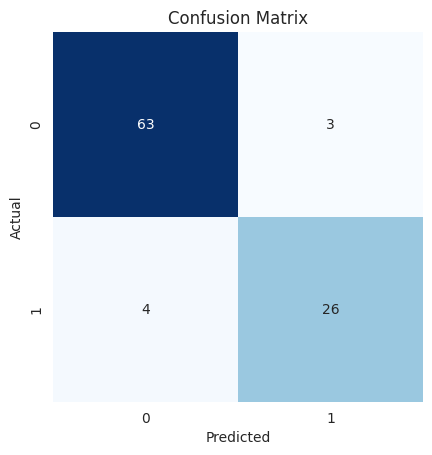

In [ ]:
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=False, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность: {accuracy:.2f}")

Точность: 0.93


In [ ]:
from sklearn.metrics import precision_score, recall_score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print(f"Точность: {precision:.2f}")
print(f"Полнота: {recall:.2f}")


Точность: 0.90
Полнота: 0.87


In [ ]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)
print(f"F1-мера: {f1:.2f}")


F1-мера: 0.88


In [ ]:
df_copy.corr()

,Age,Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
Age,1.000000,0.309536,0.176588,0.047879,-0.060932,0.114766,0.170184,0.223847,0.295556,0.242670,0.061243,0.235401,0.503965,0.258010,0.258897
Smoking,0.309536,1.000000,0.297874,0.020118,-0.060002,0.262182,0.214388,0.238494,0.374324,0.377728,0.204305,0.321233,0.416719,0.341073,0.333243
Hx Radiothreapy,0.176588,0.297874,1.000000,-0.002233,-0.007167,0.203802,0.092961,0.102415,0.272056,0.225794,0.095535,0.430214,0.475966,0.157247,0.174407
Thyroid Function,0.047879,0.020118,-0.002233,1.000000,-0.109405,0.035527,0.041159,0.050127,0.037305,0.007175,0.008731,-0.005618,0.068093,-0.035593,-0.035443
Physical Examination,-0.060932,-0.060002,-0.007167,-0.109405,1.000000,-0.188736,-0.034962,-0.248162,-0.152756,-0.102734,-0.121279,-0.017060,-0.082501,-0.152362,-0.119198
Adenopathy,0.114766,0.262182,0.203802,0.035527,-0.188736,1.000000,-0.120476,0.379801,0.647265,0.478959,0.812890,0.209781,0.300137,0.618467,0.611580
Pathology,0.170184,0.214388,0.092961,0.041159,-0.034962,-0.120476,1.000000,0.069983,0.009294,-0.001917,-0.225405,0.033699,0.079719,0.013190,-0.029352
Focality,0.223847,0.238494,0.102415,0.050127,-0.248162,0.379801,0.069983,1.000000,0.450615,0.454832,0.376692,0.221931,0.318009,0.420531,0.383776
Risk,0.295556,0.374324,0.272056,0.037305,-0.152756,0.647265,0.009294,0.450615,1.000000,0.680255,0.696764,0.503143,0.601332,0.705354,0.733376
T,0.242670,0.377728,0.225794,0.007175,-0.102734,0.478959,-0.001917,0.454832,0.680255,1.000000,0.458701,0.388490,0.525205,0.589057,0.556201


### 10. Строим ROC-кривую

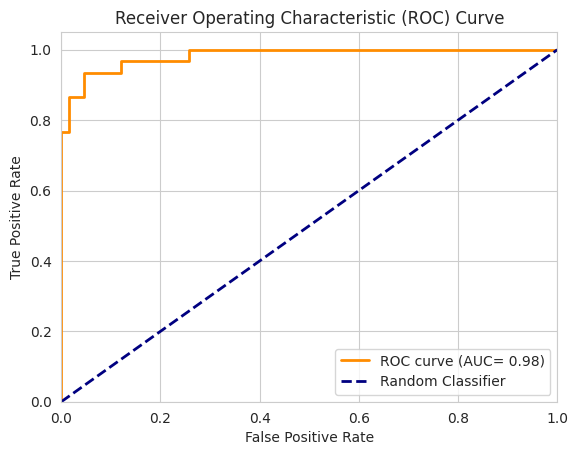

In [ ]:
from sklearn.metrics import roc_curve, auc

# Получаем предсказанные вероятности для класса 1
y_score = model.predict_proba(X_test) [:, 1]

# Рассчитываем FPR, TPR и пороги
fpr, tpr, thresholds = roc_curve(y_test, y_score)

# (Опционально) Рассчитываем AUC (Area Under Curve) площадь под кривой
roc_auc = auc(fpr, tpr)

# Строим график
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC= {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()